Feature Story 1 : Analyse et Préparation des Données

Tâche 1 : Chargement des données

Importer les données à l'aide de la bibliothèque Pandas.

In [ ]:
import pandas as pd 

data = pd.read_csv("assurance-maladie.csv")
data.head()
# data.tail()




,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Vérifier le type et la structure des colonnes.

In [13]:
print(data.dtypes)

print(data.info)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 row

In [10]:
data2 = data[["children", "smoker"]]

sorted_data = data2.sort_values("children")

sorted_data.head()


,children,smoker
4,0,no
5,0,no
1331,0,no
584,0,no
588,0,no


Tâche 2 : Analyse exploratoire des données (EDA)

Effectuer une analyse descriptive des données (moyennes, médianes, écarts-types pour les variables numériques ; fréquences pour les catégoriques).

In [14]:
data[['age' , 'bmi', 'children', 'charges']].agg(['mean', 'max' , 'min' , 'median' , 'std'])

,age,bmi,children,charges
mean,39.207025,30.663397,1.094918,13270.422265
max,64.000000,53.130000,5.000000,63770.428010
min,18.000000,15.960000,0.000000,1121.873900
median,39.000000,30.400000,1.000000,9382.033000
std,14.049960,6.098187,1.205493,12110.011237


In [15]:
# this is another method but here we get all the statistics :

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
# this is a third method also to do the same : 

num_colonnes = data.select_dtypes(include='number')

moyennes = num_colonnes.mean()
ecarts_types = num_colonnes.std()
medians = num_colonnes.median()

print(moyennes)
print(ecarts_types)
print(medians)

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64
age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64
age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64


In [22]:
#  fréquences pour les catégoriques :

cat_colonnes = data.select_dtypes(include='object')

categoriques_frequences = {}

for col in cat_colonnes :
    categoriques_frequences[col] = data[col].value_counts()

for result in categoriques_frequences.values():
    print(result)





sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [39]:
for col in cat_colonnes :
    print(data[col].unique()) 

# print( data.sort_values('age'))


['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [40]:
for col in cat_colonnes :
    print(data.groupby(col).head(3)) 

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
    age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
11   62  female  26.290         0    yes  southeast  27808.72510
14   27    male  42.130         0    yes  southeast  39611.75770
    age     sex     bmi  children smoker     region      charges
0    19  female  27.900         

In [42]:
females_data = data.query('sex == "female"')

print(females_data.count())

age         662
sex         662
bmi         662
children    662
smoker      662
region      662
charges     662
dtype: int64


Identifier les valeurs manquantes et les doublons.

In [57]:
# Identifier les valeurs les doublons.

dup_data = data.duplicated(keep =False)

print(data[dup_data])

# for x , bool_x in dup_data.items() :
#     if bool_x :
#         print(data.loc[x])
       



     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


Identifier les valeurs manquantes

In [ ]:
# isna(), fillna(), dropna()
x = data.isnull() 
display( data[x])
   

# print(data[data.isna().any(axis = 1)])


# print(data.isnull().sum())

age         0.0
sex           0
bmi         0.0
children    0.0
smoker        0
region        0
charges     0.0
dtype: object

Analyser la distribution des variables numériques (ex. : histogrammes avec Matplotlib/Seaborn).

In [87]:
import seaborn as sns

In [89]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='bmi', ylabel='charges'>

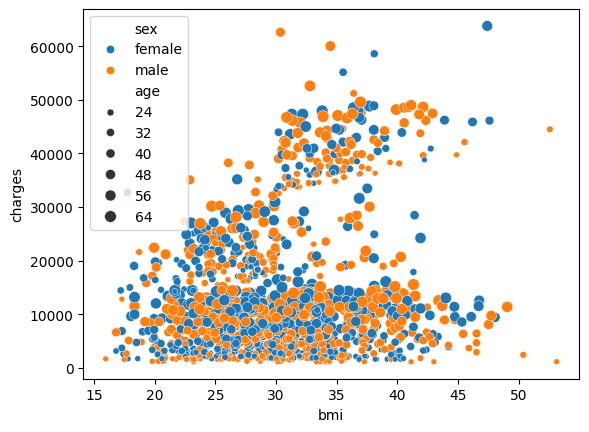

In [106]:
sns.scatterplot(x='bmi' , y= 'charges' , data = data , hue="sex" , size = 'age' )

<Axes: xlabel='bmi', ylabel='Count'>

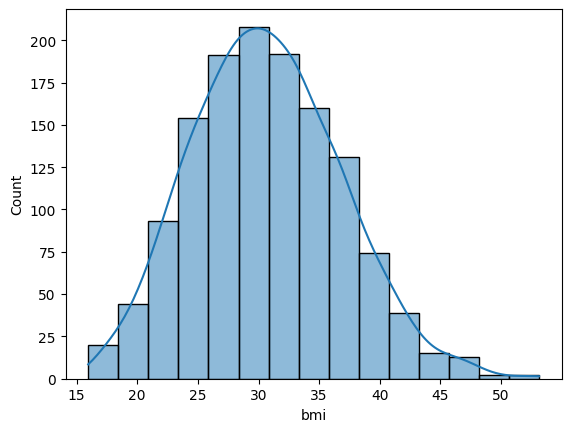

In [112]:
sns.histplot(data['bmi'] , kde= True , bins = 15)

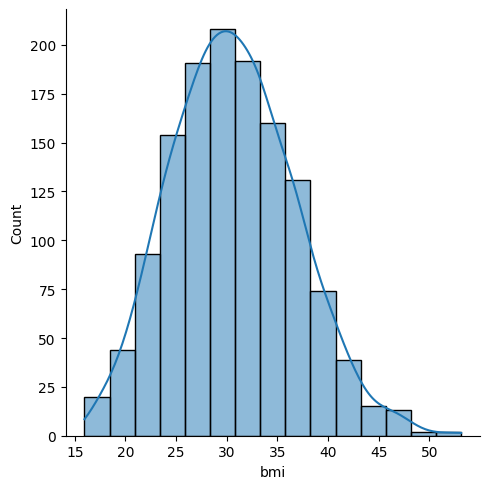

In [117]:
sns.displot(data['bmi'] , kde= True , bins = 15)

<Axes: xlabel='smoker', ylabel='charges'>

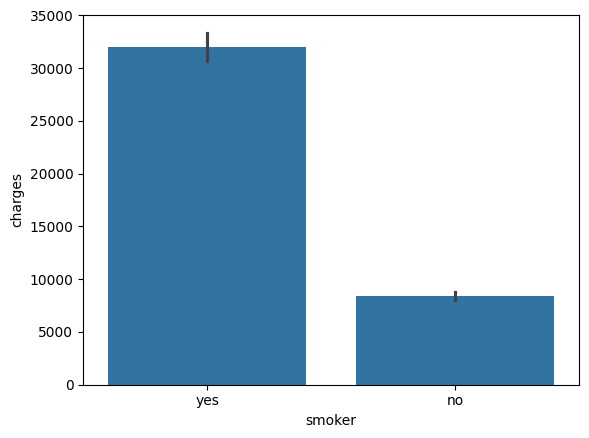

In [124]:
sns.barplot(x='smoker' , y= 'charges' , data = data )

<Axes: xlabel='children', ylabel='charges'>

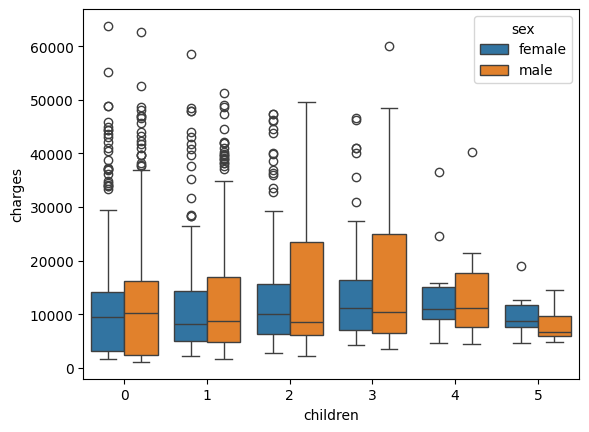

In [130]:
sns.boxplot(x='children' , y= 'charges' , hue = "sex" , data = data )

<Axes: xlabel='smoker', ylabel='bmi'>

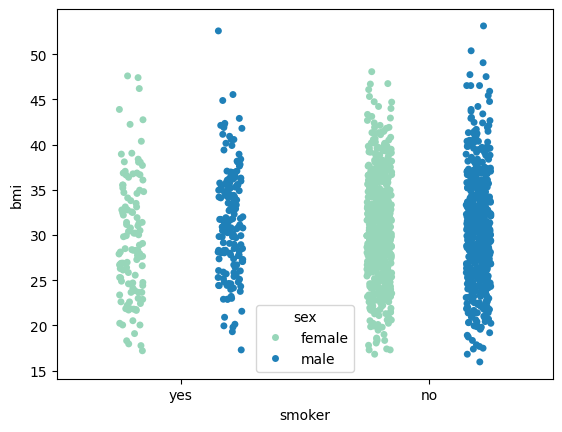

In [146]:
sns.stripplot(x='smoker' , y = 'bmi' , data = data , hue = 'sex' , palette = "YlGnBu" , dodge = True)

c:\Users\kaout\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


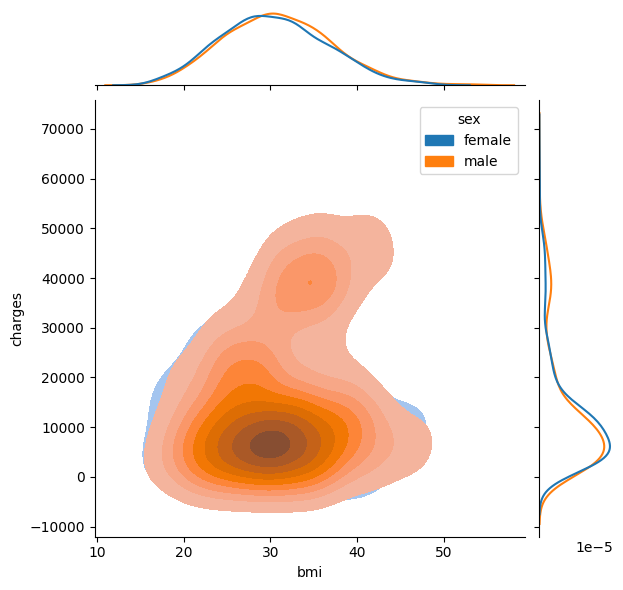

In [168]:
sns.jointplot(x= 'bmi' , y = 'charges' , data = data , hue ='sex' , kind ='kde' , shade = True )

# data.info()

In [176]:
sns.pairplot(data = data , hue = 'smoker' , , diag_kind="hist")

SyntaxError: invalid syntax (4157591139.py, line 1)

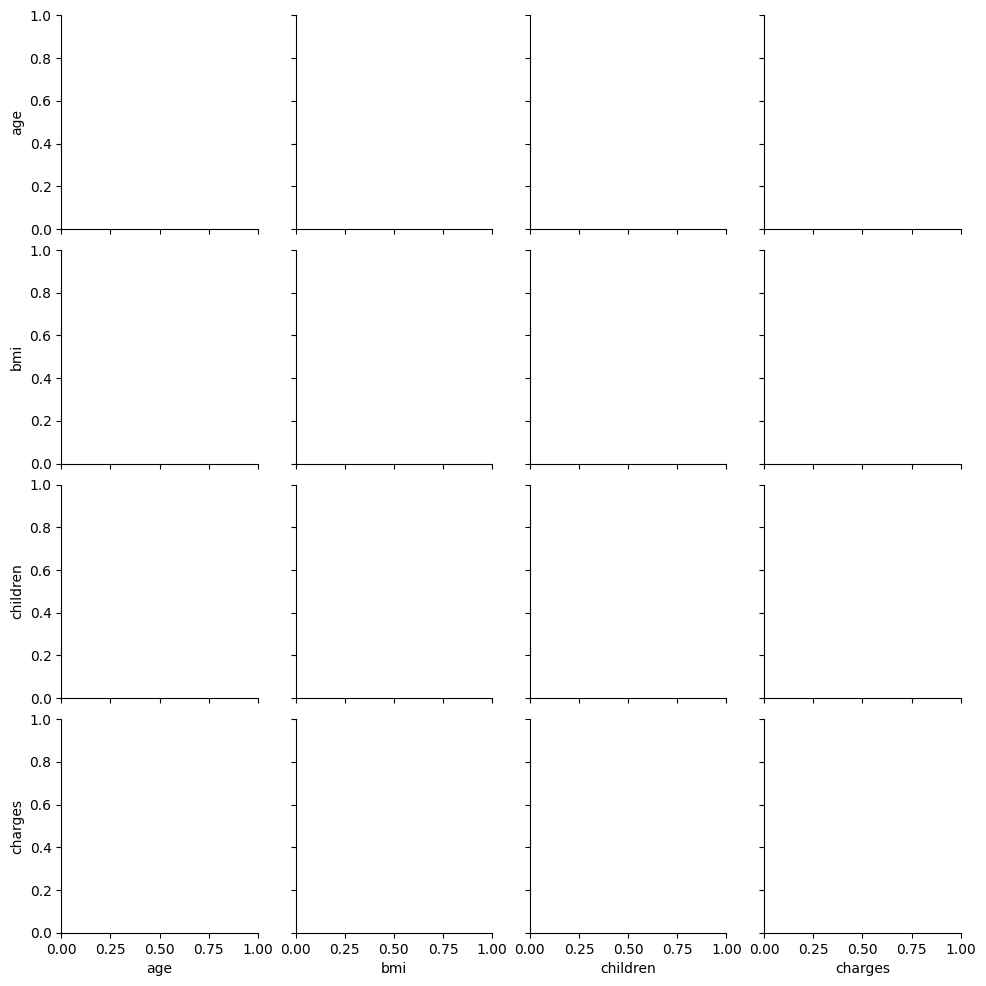

In [172]:
sns.PairGrid(data)